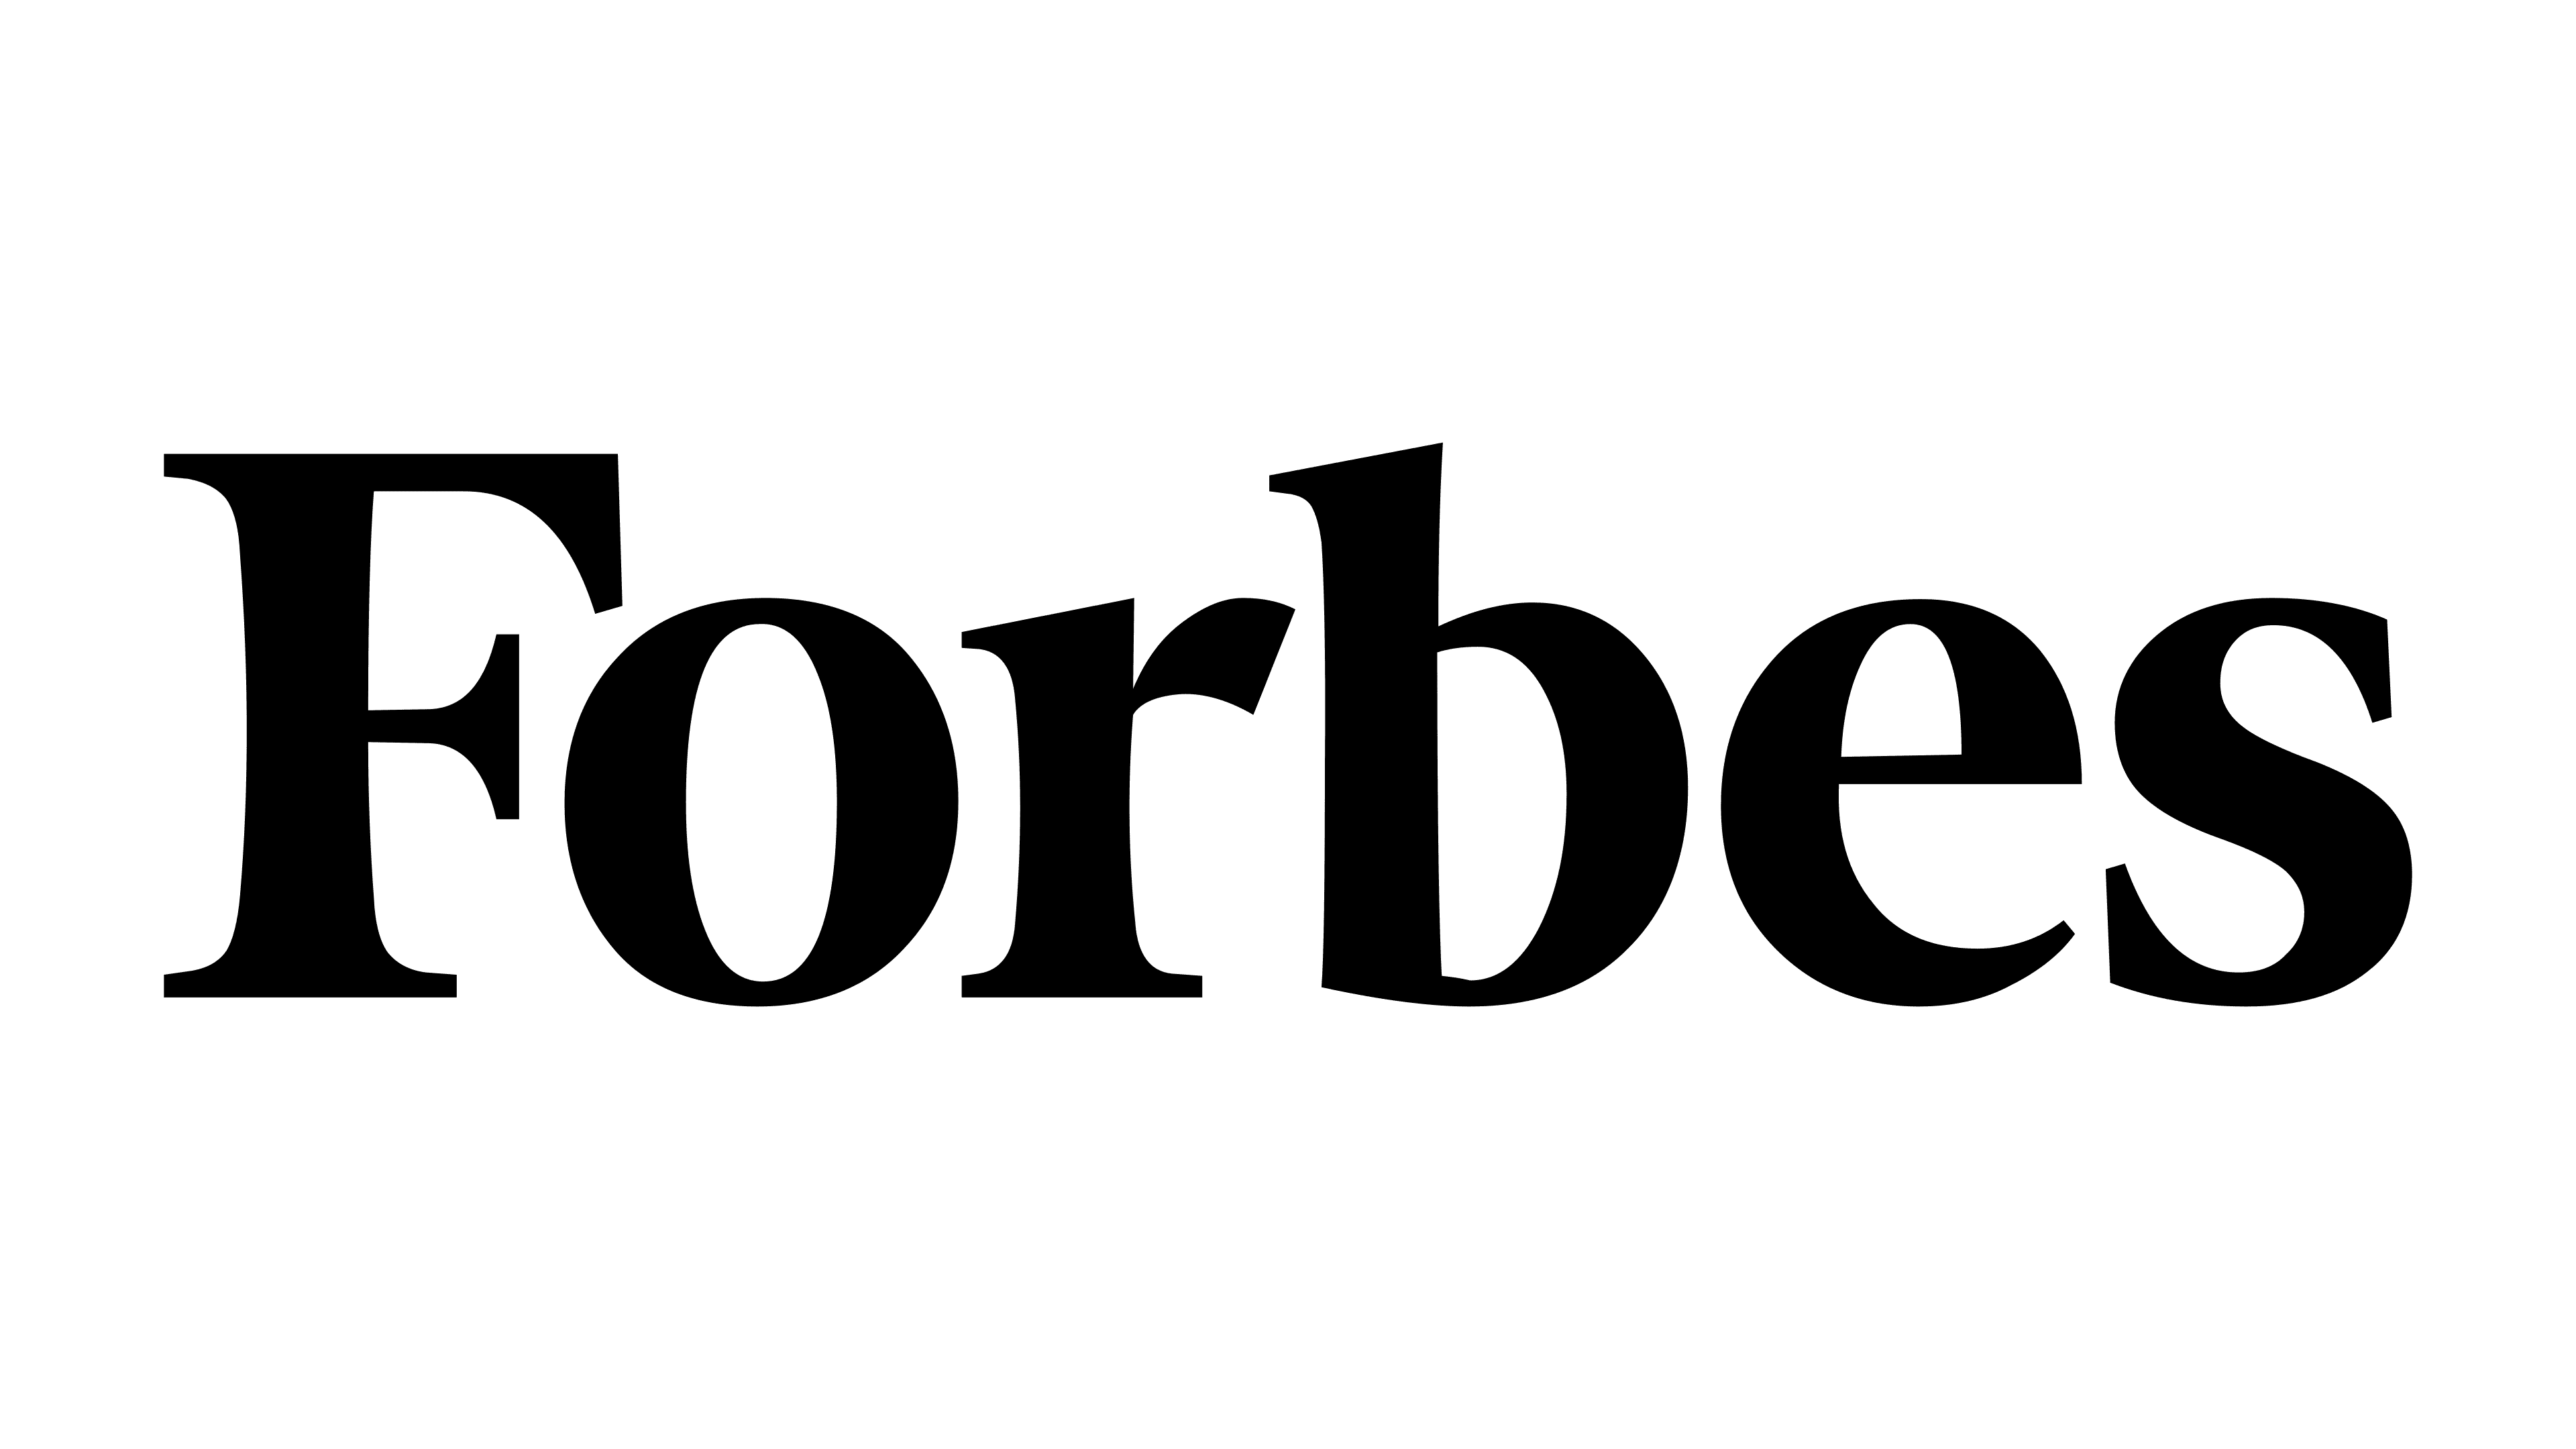

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("forbes_2022_billionaires.csv")

In [3]:
df.head()

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000.0,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,1971-06-28,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,1964-01-12,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000.0,2022,4,Fashion & Retail,LVMH,France,NaN,...,LVMH Moët Hennessy Louis Vuitton,False,M,1949-03-05,Chairman and CEO,NaN,NaN,NaN,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000.0,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,1955-10-28,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",NaN,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000.0,2022,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,Berkshire Hathaway,True,M,1930-08-30,CEO,5.0,"Omaha, NE",NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rank                  2668 non-null   int64  
 1   personName            2668 non-null   object 
 2   age                   2582 non-null   float64
 3   finalWorth            2668 non-null   float64
 4   year                  2668 non-null   int64  
 5   month                 2668 non-null   int64  
 6   category              2668 non-null   object 
 7   source                2668 non-null   object 
 8   country               2655 non-null   object 
 9   state                 748 non-null    object 
 10  city                  2624 non-null   object 
 11  countryOfCitizenship  2668 non-null   object 
 12  organization          352 non-null    object 
 13  selfMade              2668 non-null   bool   
 14  gender                2652 non-null   object 
 15  birthDate            

In [5]:
df.isna().sum()

rank                       0
personName                 0
age                       86
finalWorth                 0
year                       0
month                      0
category                   0
source                     0
country                   13
state                   1920
city                      44
countryOfCitizenship       0
organization            2316
selfMade                   0
gender                    16
birthDate                 99
title                   2267
philanthropyScore       2272
residenceMsa            2029
numberOfSiblings        2541
bio                        0
about                   1106
dtype: int64

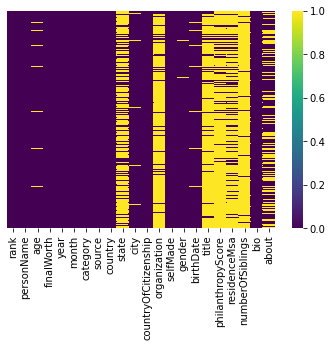

In [6]:
sns.heatmap(df.isna(),yticklabels=False,cmap="viridis")
plt.show()

In [7]:
df.drop(["state","organization","title","philanthropyScore","residenceMsa","numberOfSiblings","bio","about","personName","year","month"],axis=1,inplace=True)

In [8]:
df.isna().sum()

rank                     0
age                     86
finalWorth               0
category                 0
source                   0
country                 13
city                    44
countryOfCitizenship     0
selfMade                 0
gender                  16
birthDate               99
dtype: int64

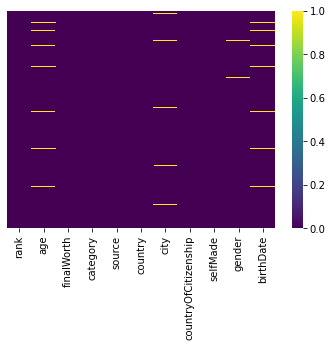

In [9]:
sns.heatmap(df.isna(),yticklabels=False,cmap="viridis")
plt.show()

In [10]:
df.dropna(axis=0,subset=["country"],inplace=True)
df.dropna(axis=0,subset=["city"],inplace=True)
df.dropna(axis=0,subset=["gender"],inplace=True)

In [11]:
df["birthDate"]=df["birthDate"].astype("str")

In [12]:
def code(cols):
    if(cols==np.NaN):
        pass
    else:
        return (cols.split("-")[0])

In [13]:
df["Yob"]=df["birthDate"].apply(code)
df.drop(["birthDate"],axis=1,inplace=True)

In [14]:
df["Yob"]=df["Yob"].astype("float64")
x=df["Yob"].mean()
df["Yob"].fillna(x,inplace=True)
df["Yob"]=df["Yob"].astype("int64")

In [15]:
df["age"]=df["age"].astype("float64")
y=df["age"].mean()
df["age"].fillna(y,inplace=True)
df["age"]=df["age"].astype("int64")

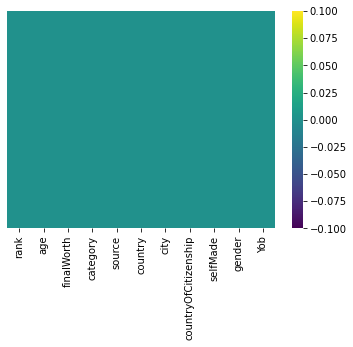

In [16]:
sns.heatmap(df.isna(),yticklabels=False,cmap="viridis")
plt.show()

In [17]:
df.head()

,rank,age,finalWorth,category,source,country,city,countryOfCitizenship,selfMade,gender,Yob
0,1,50,219000.0,Automotive,"Tesla, SpaceX",United States,Austin,United States,True,M,1971
1,2,58,171000.0,Technology,Amazon,United States,Seattle,United States,True,M,1964
2,3,73,158000.0,Fashion & Retail,LVMH,France,Paris,France,False,M,1949
3,4,66,129000.0,Technology,Microsoft,United States,Medina,United States,True,M,1955
4,5,91,118000.0,Finance & Investments,Berkshire Hathaway,United States,Omaha,United States,True,M,1930


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2610 entries, 0 to 2667
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rank                  2610 non-null   int64  
 1   age                   2610 non-null   int64  
 2   finalWorth            2610 non-null   float64
 3   category              2610 non-null   object 
 4   source                2610 non-null   object 
 5   country               2610 non-null   object 
 6   city                  2610 non-null   object 
 7   countryOfCitizenship  2610 non-null   object 
 8   selfMade              2610 non-null   bool   
 9   gender                2610 non-null   object 
 10  Yob                   2610 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 226.8+ KB


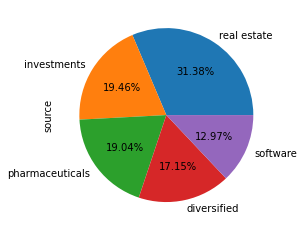

In [19]:
df["source"].value_counts().head().plot(kind="pie",autopct="%.2f%%")
plt.show()#Top sources of Income for Billionaires

In [20]:
df_cat=df.select_dtypes(["object","bool"])
df_num=df.select_dtypes(["float64","int64"])

In [21]:
df_cat.head()

,category,source,country,city,countryOfCitizenship,selfMade,gender
0,Automotive,"Tesla, SpaceX",United States,Austin,United States,True,M
1,Technology,Amazon,United States,Seattle,United States,True,M
2,Fashion & Retail,LVMH,France,Paris,France,False,M
3,Technology,Microsoft,United States,Medina,United States,True,M
4,Finance & Investments,Berkshire Hathaway,United States,Omaha,United States,True,M


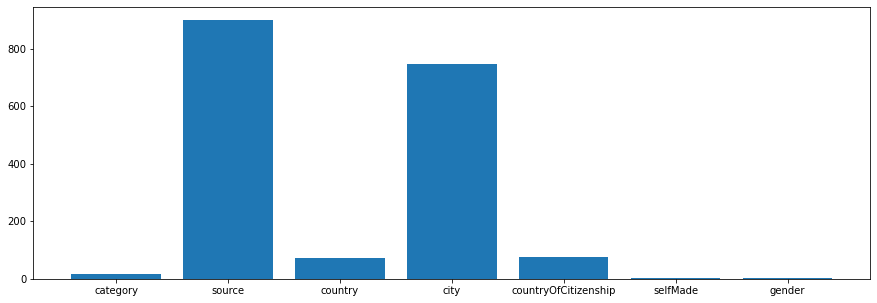

In [22]:
plt.figure(figsize=(15,5))
plt.bar(df_cat.columns,df_cat.nunique())
plt.show()

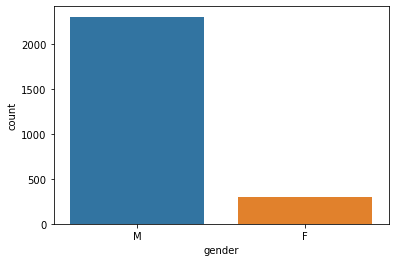

In [23]:
sns.countplot(df["gender"])
plt.show()

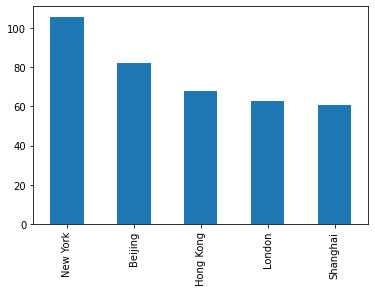

In [24]:
df["city"].value_counts().head().plot(kind="bar")
plt.show()

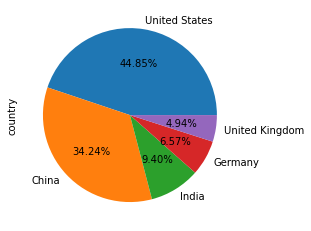

In [25]:
df["country"].value_counts().head().plot(kind="pie",autopct="%.2f%%")
plt.show()

In [26]:
df_cat.columns

Index(['category', 'source', 'country', 'city', 'countryOfCitizenship',
       'selfMade', 'gender'],
      dtype='object')

In [27]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df_cat[['category', 'source', 'country', 'city', 'countryOfCitizenship',
       'selfMade', 'gender']]=oe.fit_transform(df_cat)

In [28]:
df_cat.head()

,category,source,country,city,countryOfCitizenship,selfMade,gender
0,0.0,126.0,68.0,29.0,70.0,1.0,1.0
1,16.0,5.0,68.0,591.0,70.0,1.0,1.0
2,4.0,75.0,20.0,503.0,20.0,0.0,1.0
3,16.0,83.0,68.0,406.0,70.0,1.0,1.0
4,5.0,11.0,68.0,486.0,70.0,1.0,1.0


In [29]:
df_num.head()

,rank,age,finalWorth,Yob
0,1,50,219000.0,1971
1,2,58,171000.0,1964
2,3,73,158000.0,1949
3,4,66,129000.0,1955
4,5,91,118000.0,1930


In [30]:
from scipy.stats import skew

rank
Skewness: -0.006470037653381399


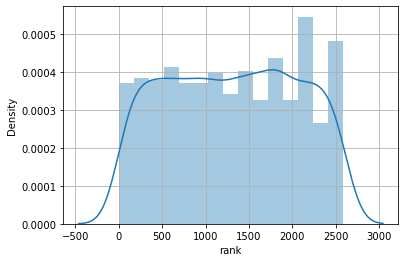

age
Skewness: -0.013600803960493402


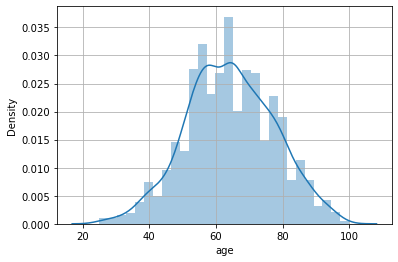

finalWorth
Skewness: 9.959357297845424


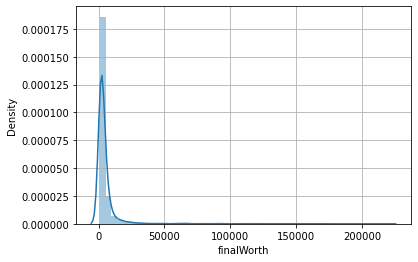

Yob
Skewness: 0.024982162741213013


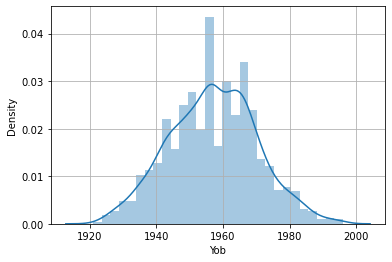

In [31]:
for col in df_num:
    print(col)
    print(f"Skewness: {skew(df_num[col])}")
    
    plt.figure()
    sns.distplot(df_num[col])
    plt.grid(True)
    plt.show()

In [32]:
df=pd.concat([df_num,df_cat],axis=1)

In [33]:
df.head()

,rank,age,finalWorth,Yob,category,source,country,city,countryOfCitizenship,selfMade,gender
0,1,50,219000.0,1971,0.0,126.0,68.0,29.0,70.0,1.0,1.0
1,2,58,171000.0,1964,16.0,5.0,68.0,591.0,70.0,1.0,1.0
2,3,73,158000.0,1949,4.0,75.0,20.0,503.0,20.0,0.0,1.0
3,4,66,129000.0,1955,16.0,83.0,68.0,406.0,70.0,1.0,1.0
4,5,91,118000.0,1930,5.0,11.0,68.0,486.0,70.0,1.0,1.0


In [34]:
df.corr()["selfMade"].sort_values()

age                    -0.089028
country                -0.059393
countryOfCitizenship   -0.056881
finalWorth             -0.024166
city                    0.025876
rank                    0.067922
Yob                     0.088234
source                  0.158130
category                0.203351
gender                  0.329589
selfMade                1.000000
Name: selfMade, dtype: float64

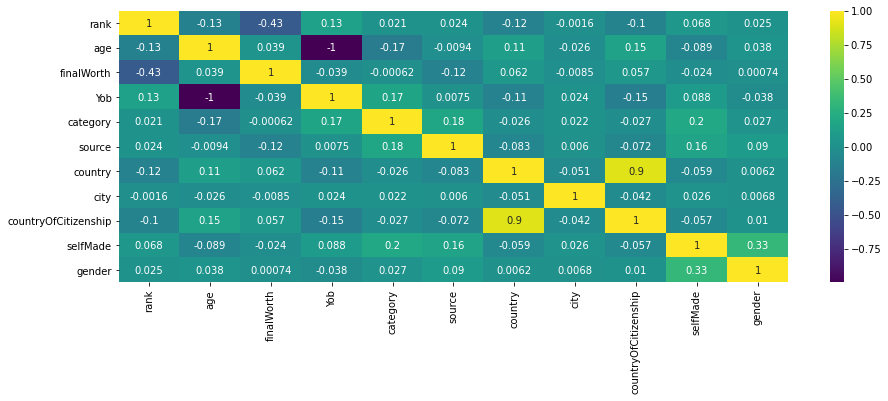

In [35]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,cmap="viridis")
plt.show()

In [36]:
df.columns

Index(['rank', 'age', 'finalWorth', 'Yob', 'category', 'source', 'country',
       'city', 'countryOfCitizenship', 'selfMade', 'gender'],
      dtype='object')

In [37]:
x=df.loc[ : ,['rank', 'age', 'finalWorth', 'Yob', 'category', 'source', 'country',
       'city', 'countryOfCitizenship', 'gender']]
x.head()

,rank,age,finalWorth,Yob,category,source,country,city,countryOfCitizenship,gender
0,1,50,219000.0,1971,0.0,126.0,68.0,29.0,70.0,1.0
1,2,58,171000.0,1964,16.0,5.0,68.0,591.0,70.0,1.0
2,3,73,158000.0,1949,4.0,75.0,20.0,503.0,20.0,1.0
3,4,66,129000.0,1955,16.0,83.0,68.0,406.0,70.0,1.0
4,5,91,118000.0,1930,5.0,11.0,68.0,486.0,70.0,1.0


In [38]:
y=df.loc[ : ,["selfMade"]]
y.head()

,selfMade
0,1.0
1,1.0
2,0.0
3,1.0
4,1.0


In [39]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [42]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.35      0.26      0.30       212
         1.0       0.75      0.82      0.78       571

    accuracy                           0.67       783
   macro avg       0.55      0.54      0.54       783
weighted avg       0.64      0.67      0.65       783



In [43]:
accuracy_score(ytest,ypred)

0.6704980842911877

In [44]:
confusion_matrix(ytest,ypred)

array([[ 55, 157],
       [101, 470]], dtype=int64)

#### Hyper-Parameter Tuning

In [45]:
accuracy=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    accuracy.append(ac)

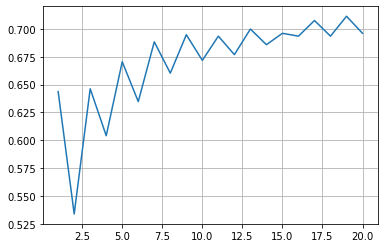

In [46]:
plt.plot(range(1,21),accuracy)
plt.grid(True)
plt.show()

In [47]:
knn=KNeighborsClassifier(n_neighbors=19)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [48]:
accuracy_score(ytest,ypred)

0.7113665389527458

In [49]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.36      0.08      0.14       212
         1.0       0.74      0.94      0.83       571

    accuracy                           0.71       783
   macro avg       0.55      0.51      0.48       783
weighted avg       0.63      0.71      0.64       783



In [50]:
confusion_matrix(ytest,ypred)

array([[ 18, 194],
       [ 32, 539]], dtype=int64)

#### Cross Validation Score

In [51]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(knn,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.28735632 0.37547893 0.36015326 0.4789272  0.71072797]
CVS Mean: 0.44252873563218387
CVS Standard Deviation: 0.14738761938427372


#### Bagging

In [52]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(knn)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [53]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.37      0.09      0.15       212
         1.0       0.74      0.94      0.83       571

    accuracy                           0.71       783
   macro avg       0.55      0.52      0.49       783
weighted avg       0.64      0.71      0.64       783



In [54]:
accuracy_score(ytest,ypred)

0.7113665389527458

In [55]:
confusion_matrix(ytest,ypred)

array([[ 20, 192],
       [ 34, 537]], dtype=int64)

# Logistic Regresion

In [56]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [57]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.57      0.11      0.19       212
         1.0       0.75      0.97      0.84       571

    accuracy                           0.74       783
   macro avg       0.66      0.54      0.52       783
weighted avg       0.70      0.74      0.67       783



In [58]:
accuracy_score(ytest,ypred)

0.7369093231162197

In [59]:
confusion_matrix(ytest,ypred)

array([[ 24, 188],
       [ 18, 553]], dtype=int64)

#### Hyper-Parameter Tuning

In [60]:
params={
    "C":np.logspace(-3,3,7),
    "solver":["liblinear","newton-cg","sag","saga","lbfgs"],
    "penalty":["l1","l2","elasticnet"]
}

In [61]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(logreg,params,verbose=3)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 105 candidates, totalling 525 fits
[CV 1/5] END ..........C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV 2/5] END ..........C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV 3/5] END ..........C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV 4/5] END ..........C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV 5/5] END ..........C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV 1/5] END ..........C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 2/5] END ..........C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 3/5] END ..........C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 4/5] END ..........C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 5/5] END ..........C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 1/5] END ................C=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV 2/5] END ................C=0.001, penalty=

[CV 1/5] END ...........C=0.01, penalty=l2, solver=newton-cg; total time=   0.2s
[CV 2/5] END ...........C=0.01, penalty=l2, solver=newton-cg; total time=   0.3s
[CV 3/5] END ...........C=0.01, penalty=l2, solver=newton-cg; total time=   0.2s
[CV 4/5] END ...........C=0.01, penalty=l2, solver=newton-cg; total time=   0.1s
[CV 5/5] END ...........C=0.01, penalty=l2, solver=newton-cg; total time=   0.2s
[CV 1/5] END .................C=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV 2/5] END .................C=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV 3/5] END .................C=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV 4/5] END .................C=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV 5/5] END .................C=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV 1/5] END ................C=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV 2/5] END ................C=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV 3/5] END ...............

[CV 2/5] END ............C=1.0, penalty=l1, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=1.0, penalty=l1, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=1.0, penalty=l1, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=1.0, penalty=l1, solver=liblinear; total time=   0.0s
[CV 1/5] END ............C=1.0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 2/5] END ............C=1.0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 3/5] END ............C=1.0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 4/5] END ............C=1.0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 5/5] END ............C=1.0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 1/5] END ..................C=1.0, penalty=l1, solver=sag; total time=   0.0s
[CV 2/5] END ..................C=1.0, penalty=l1, solver=sag; total time=   0.0s
[CV 3/5] END ..................C=1.0, penalty=l1, solver=sag; total time=   0.0s
[CV 4/5] END ...............

[CV 1/5] END ...........C=10.0, penalty=l2, solver=newton-cg; total time=   0.1s
[CV 2/5] END ...........C=10.0, penalty=l2, solver=newton-cg; total time=   0.1s
[CV 3/5] END ...........C=10.0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 4/5] END ...........C=10.0, penalty=l2, solver=newton-cg; total time=   0.1s
[CV 5/5] END ...........C=10.0, penalty=l2, solver=newton-cg; total time=   0.1s
[CV 1/5] END .................C=10.0, penalty=l2, solver=sag; total time=   0.0s
[CV 2/5] END .................C=10.0, penalty=l2, solver=sag; total time=   0.0s
[CV 3/5] END .................C=10.0, penalty=l2, solver=sag; total time=   0.0s
[CV 4/5] END .................C=10.0, penalty=l2, solver=sag; total time=   0.0s
[CV 5/5] END .................C=10.0, penalty=l2, solver=sag; total time=   0.0s
[CV 1/5] END ................C=10.0, penalty=l2, solver=saga; total time=   0.0s
[CV 2/5] END ................C=10.0, penalty=l2, solver=saga; total time=   0.0s
[CV 3/5] END ...............

[CV 4/5] END .........C=1000.0, penalty=l1, solver=liblinear; total time=   0.0s
[CV 5/5] END .........C=1000.0, penalty=l1, solver=liblinear; total time=   0.0s
[CV 1/5] END .........C=1000.0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 2/5] END .........C=1000.0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 3/5] END .........C=1000.0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 4/5] END .........C=1000.0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 5/5] END .........C=1000.0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 1/5] END ...............C=1000.0, penalty=l1, solver=sag; total time=   0.0s
[CV 2/5] END ...............C=1000.0, penalty=l1, solver=sag; total time=   0.0s
[CV 3/5] END ...............C=1000.0, penalty=l1, solver=sag; total time=   0.0s
[CV 4/5] END ...............C=1000.0, penalty=l1, solver=sag; total time=   0.0s
[CV 5/5] END ...............C=1000.0, penalty=l1, solver=sag; total time=   0.0s
[CV 1/5] END ..............C

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'newton-cg', 'sag', 'saga',
                                    'lbfgs']},
             verbose=3)

In [62]:
grid.best_score_

0.7531551762856501

In [63]:
grid.best_params_

{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}

In [64]:
grid.best_estimator_

LogisticRegression(penalty='l1', solver='liblinear')

In [65]:
logreg=grid.best_estimator_
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [66]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.71      0.33      0.45       212
         1.0       0.79      0.95      0.86       571

    accuracy                           0.78       783
   macro avg       0.75      0.64      0.66       783
weighted avg       0.77      0.78      0.75       783



In [67]:
accuracy_score(ytest,ypred)

0.7816091954022989

In [68]:
confusion_matrix(ytest,ypred)

array([[ 70, 142],
       [ 29, 542]], dtype=int64)

#### Cross Validation Score

In [69]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(logreg,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.54022989 0.7816092  0.74712644 0.74521073 0.75862069]
CVS Mean: 0.7145593869731801
CVS Standard Deviation: 0.08812260536398467


#### Bagging

In [70]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(logreg)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [71]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.72      0.34      0.46       212
         1.0       0.80      0.95      0.87       571

    accuracy                           0.79       783
   macro avg       0.76      0.65      0.67       783
weighted avg       0.77      0.79      0.76       783



In [72]:
accuracy_score(ytest,ypred)

0.7854406130268199

In [73]:
confusion_matrix(ytest,ypred)

array([[ 73, 139],
       [ 29, 542]], dtype=int64)

# Naive Bayes

In [74]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(xtrain,ytrain)
ypred=nb.predict(xtest)

In [75]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.67      0.31      0.42       212
         1.0       0.79      0.94      0.86       571

    accuracy                           0.77       783
   macro avg       0.73      0.63      0.64       783
weighted avg       0.75      0.77      0.74       783



In [76]:
accuracy_score(ytest,ypred)

0.7713920817369093

In [77]:
confusion_matrix(ytest,ypred)

array([[ 65, 147],
       [ 32, 539]], dtype=int64)

#### Cross Validation Score

In [78]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(nb,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.3697318  0.77777778 0.72796935 0.74137931 0.73754789]
CVS Mean: 0.67088122605364
CVS Standard Deviation: 0.1515198516348226


# Decision Tree

In [79]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

In [80]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.55      0.64      0.59       212
         1.0       0.86      0.81      0.83       571

    accuracy                           0.76       783
   macro avg       0.71      0.72      0.71       783
weighted avg       0.77      0.76      0.77       783



In [81]:
accuracy_score(ytest,ypred)

0.7624521072796935

In [82]:
confusion_matrix(ytest,ypred)

array([[135,  77],
       [109, 462]], dtype=int64)

#### Hyper-Parameter Tuning

In [83]:
s=0
for i in range(1,100):
    dt=DecisionTreeClassifier(criterion="gini",max_depth=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    ss=accuracy_score(ytest,ypred)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.7828863346104725 2


In [84]:
s=0
for i in range(1,100):
    dt=DecisionTreeClassifier(criterion="gini",min_samples_leaf=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    ss=accuracy_score(ytest,ypred)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.7982120051085568 91


In [85]:
s=0
for i in range(1,100):
    dt=DecisionTreeClassifier(criterion="entropy",max_depth=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    ss=accuracy_score(ytest,ypred)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.7828863346104725 2


In [86]:
s=0
for i in range(1,100):
    dt=DecisionTreeClassifier(criterion="entropy",min_samples_leaf=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    ss=accuracy_score(ytest,ypred)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.7918263090676884 10


In [87]:
dt=DecisionTreeClassifier(criterion="gini",min_samples_leaf=7)
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

In [88]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.64      0.57      0.60       212
         1.0       0.85      0.88      0.86       571

    accuracy                           0.80       783
   macro avg       0.74      0.73      0.73       783
weighted avg       0.79      0.80      0.79       783



In [89]:
accuracy_score(ytest,ypred)

0.7969348659003831

In [90]:
confusion_matrix(ytest,ypred)

array([[121,  91],
       [ 68, 503]], dtype=int64)

#### Tree 

In [91]:
from sklearn import tree

In [92]:
fig, ax= plt.subplots(figsize=(150,150))
chart=tree.plot_tree(dt, feature_names=df.columns, fontsize=13, filled=True, rounded=True)

for node in chart:
    arrow=node.arrow_patch
    if(arrow is not None):
        arrow.set_edgecolor("red")
        arrow.set_linewidth(3)

#### Cross Validation Score

In [93]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(dt,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.57279693 0.6743295  0.73371648 0.64942529 0.7816092 ]
CVS Mean: 0.6823754789272031
CVS Standard Deviation: 0.07161164508969783


#### Bagging

In [94]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(dt)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [95]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.67      0.52      0.59       212
         1.0       0.84      0.91      0.87       571

    accuracy                           0.80       783
   macro avg       0.76      0.71      0.73       783
weighted avg       0.79      0.80      0.79       783



In [96]:
accuracy_score(ytest,ypred)

0.8020434227330779

In [97]:
confusion_matrix(ytest,ypred)

array([[110, 102],
       [ 53, 518]], dtype=int64)

# Random Forest 

In [98]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)

In [99]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.72      0.58      0.65       212
         1.0       0.86      0.92      0.88       571

    accuracy                           0.83       783
   macro avg       0.79      0.75      0.77       783
weighted avg       0.82      0.83      0.82       783



In [100]:
accuracy_score(ytest,ypred)

0.8263090676883781

In [101]:
confusion_matrix(ytest,ypred)

array([[124,  88],
       [ 48, 523]], dtype=int64)

#### Cross Validation Score

In [102]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(rf,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.56896552 0.72796935 0.74904215 0.74137931 0.7394636 ]
CVS Mean: 0.7053639846743296
CVS Standard Deviation: 0.06853205628504237


# Support Vector Classifier

In [103]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
xtrain=ss.fit_transform(xtrain)
xtest=ss.fit_transform(xtest)

In [104]:
from sklearn.svm import SVC
svc=SVC(kernel="rbf")
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)

In [105]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.75      0.28      0.41       212
         1.0       0.78      0.96      0.86       571

    accuracy                           0.78       783
   macro avg       0.76      0.62      0.63       783
weighted avg       0.77      0.78      0.74       783



In [106]:
accuracy_score(ytest,ypred)

0.7790549169859514

In [107]:
confusion_matrix(ytest,ypred)

array([[ 59, 153],
       [ 20, 551]], dtype=int64)

In [108]:
svc=SVC(kernel="linear")
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)

In [109]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.70      0.29      0.41       212
         1.0       0.78      0.95      0.86       571

    accuracy                           0.77       783
   macro avg       0.74      0.62      0.64       783
weighted avg       0.76      0.77      0.74       783



In [110]:
accuracy_score(ytest,ypred)

0.7739463601532567

In [111]:
confusion_matrix(ytest,ypred)

array([[ 62, 150],
       [ 27, 544]], dtype=int64)

In [112]:
svc=SVC(kernel="poly")
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)

In [113]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.67      0.29      0.41       212
         1.0       0.78      0.95      0.86       571

    accuracy                           0.77       783
   macro avg       0.73      0.62      0.63       783
weighted avg       0.75      0.77      0.74       783



In [114]:
accuracy_score(ytest,ypred)

0.7701149425287356

In [115]:
svc=SVC(kernel="sigmoid")
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)

In [116]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.34      0.34      0.34       212
         1.0       0.75      0.75      0.75       571

    accuracy                           0.64       783
   macro avg       0.55      0.55      0.55       783
weighted avg       0.64      0.64      0.64       783



In [117]:
accuracy_score(ytest,ypred)

0.6398467432950191

#### Hyper-Parameter Tuning 

In [118]:
params={
    "C": np.logspace(-3,3,7),
    "gamma":np.logspace(-3,3,7),
    "kernel":["rbf"]
}

In [119]:
grid=GridSearchCV(svc,params,verbose=3)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV 1/5] END ...............C=0.001, gamma=0.001, kernel=rbf; total time=   0.1s
[CV 2/5] END ...............C=0.001, gamma=0.001, kernel=rbf; total time=   0.1s
[CV 3/5] END ...............C=0.001, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 4/5] END ...............C=0.001, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 5/5] END ...............C=0.001, gamma=0.001, kernel=rbf; total time=   0.1s
[CV 1/5] END ................C=0.001, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ................C=0.001, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END ................C=0.001, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END ................C=0.001, gamma=0.01, kernel=rbf; total time=   0.1s
[CV 5/5] END ................C=0.001, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=0.001, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=0.001, gamma=0.

[CV 2/5] END ................C=0.1, gamma=1000.0, kernel=rbf; total time=   0.2s
[CV 3/5] END ................C=0.1, gamma=1000.0, kernel=rbf; total time=   0.2s
[CV 4/5] END ................C=0.1, gamma=1000.0, kernel=rbf; total time=   0.2s
[CV 5/5] END ................C=0.1, gamma=1000.0, kernel=rbf; total time=   0.2s
[CV 1/5] END .................C=1.0, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=1.0, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=1.0, gamma=0.001, kernel=rbf; total time=   0.1s
[CV 4/5] END .................C=1.0, gamma=0.001, kernel=rbf; total time=   0.1s
[CV 5/5] END .................C=1.0, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=1.0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=1.0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=1.0, gamma=0.01, kernel=rbf; total time=   0.1s
[CV 4/5] END ...............

[CV 4/5] END ...............C=100.0, gamma=100.0, kernel=rbf; total time=   0.2s
[CV 5/5] END ...............C=100.0, gamma=100.0, kernel=rbf; total time=   0.2s
[CV 1/5] END ..............C=100.0, gamma=1000.0, kernel=rbf; total time=   0.2s
[CV 2/5] END ..............C=100.0, gamma=1000.0, kernel=rbf; total time=   0.2s
[CV 3/5] END ..............C=100.0, gamma=1000.0, kernel=rbf; total time=   0.2s
[CV 4/5] END ..............C=100.0, gamma=1000.0, kernel=rbf; total time=   0.2s
[CV 5/5] END ..............C=100.0, gamma=1000.0, kernel=rbf; total time=   0.2s
[CV 1/5] END ..............C=1000.0, gamma=0.001, kernel=rbf; total time=   0.5s
[CV 2/5] END ..............C=1000.0, gamma=0.001, kernel=rbf; total time=   0.6s
[CV 3/5] END ..............C=1000.0, gamma=0.001, kernel=rbf; total time=   0.9s
[CV 4/5] END ..............C=1000.0, gamma=0.001, kernel=rbf; total time=   0.6s
[CV 5/5] END ..............C=1000.0, gamma=0.001, kernel=rbf; total time=   0.5s
[CV 1/5] END ...............

GridSearchCV(estimator=SVC(kernel='sigmoid'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'kernel': ['rbf']},
             verbose=3)

In [120]:
grid.best_score_

0.7580911744891085

In [121]:
grid.best_params_

{'C': 1000.0, 'gamma': 0.01, 'kernel': 'rbf'}

In [122]:
grid.best_estimator_

SVC(C=1000.0, gamma=0.01)

In [123]:
svc=grid.best_estimator_
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)

In [124]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.66      0.33      0.44       212
         1.0       0.79      0.94      0.86       571

    accuracy                           0.77       783
   macro avg       0.73      0.63      0.65       783
weighted avg       0.76      0.77      0.74       783



In [125]:
accuracy_score(ytest,ypred)

0.7726692209450831

In [126]:
confusion_matrix(ytest,ypred)

array([[ 70, 142],
       [ 36, 535]], dtype=int64)

#### Cross Validation Score

In [127]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(svc,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.71264368 0.71264368 0.71264368 0.71264368 0.71072797]
CVS Mean: 0.7122605363984674
CVS Standard Deviation: 0.000766283524904221


#### Bagging

In [128]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(svc)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [129]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.67      0.33      0.44       212
         1.0       0.79      0.94      0.86       571

    accuracy                           0.77       783
   macro avg       0.73      0.63      0.65       783
weighted avg       0.76      0.77      0.75       783



In [130]:
accuracy_score(ytest,ypred)

0.7739463601532567

In [131]:
confusion_matrix(ytest,ypred)

array([[ 70, 142],
       [ 35, 536]], dtype=int64)

### Voting Classifier

In [132]:
models=[]
models.append(("KNeighborsClassifier", KNeighborsClassifier()))
models.append(("LogisticRegression", LogisticRegression()))
models.append(("Naive Bayes", GaussianNB()))
models.append(("DecisionTree", DecisionTreeClassifier()))
models.append(("RandomForest", RandomForestClassifier()))
models.append(("SVC", SVC()))

In [133]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=models)
vc.fit(xtrain,ytrain)
ypred = vc.predict(xtest)

In [134]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.68      0.37      0.48       212
         1.0       0.80      0.93      0.86       571

    accuracy                           0.78       783
   macro avg       0.74      0.65      0.67       783
weighted avg       0.77      0.78      0.76       783



In [135]:
accuracy_score(ytest,ypred)

0.7816091954022989

In [136]:
confusion_matrix(ytest,ypred)

array([[ 79, 133],
       [ 38, 533]], dtype=int64)

### Boosting

###### Ada Boosting

In [137]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(xtrain,ytrain)
ypred = abc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.60      0.50      0.54       212
         1.0       0.82      0.87      0.85       571

    accuracy                           0.77       783
   macro avg       0.71      0.69      0.70       783
weighted avg       0.76      0.77      0.77       783



###### Gradient Boosting

In [138]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(xtrain,ytrain)
ypred = gb.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.63      0.48      0.55       212
         1.0       0.82      0.89      0.86       571

    accuracy                           0.78       783
   macro avg       0.73      0.69      0.70       783
weighted avg       0.77      0.78      0.77       783



###### XG Boosting

In [139]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(xtrain, ytrain)
ypred = xg.predict(xtest)
print(classification_report(ytest, ypred))

[12:21:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         0.0       0.61      0.52      0.56       212
         1.0       0.83      0.88      0.85       571

    accuracy                           0.78       783
   macro avg       0.72      0.70      0.71       783
weighted avg       0.77      0.78      0.78       783



## SUMMARY